# Assignment 3: Maximum Likelihood Estimation (MLE)


---

본 과제에서는 정규분포의 모수에 대해 최대가능도 추정을 구현해보겠습니다.



## 1. 최대가능도의 정의

가능성이 가장 높은 모수를 찾는 방법인 **최대가능도 추정법** 또는 **최대우도법**(Maximum Likelihood Estimation; MLE)에 대해 알아보도록 하겠습니다. 최대가능도 추정법은 모든 추정방법 중 가장 널리 사용되는 방법으로 모수적인 데이터 밀도 추정방법입니다.

확률변수 $X$에 대해 확률밀도함수($X$가 연속형 확률변수일 경우) 또는 확률질량함수($X$가 이산형 확률변수일 경우)를 $f_X(x ; \theta)$ 또는 $p(x;θ)$로 표기하겠습니다.

$x$는 확률변수(random variable) $X$가 취할 수 있는 값($X=x$)으로 하나의 변수로만 이루어져 있는지, 여러 개의 변수들로 이루어져 있는지에 따라 스칼라값일 수도 있고 벡터값일 수도 있습니다. $θ$(theta)는 확률밀도함수의 모수(parameter)를 일반적으로 표기하는 문자로 $x$와 마찬가지로 $θ$ 또한 변수의 개수에 따라 스칼라일 수도 있고 벡터일 수도 있습니다. 예를 들어, $x$가 $n$개의 변수로 이루어진 벡터, $\theta$가 $m$개의 변수로 이루어진 벡터이면 다음과 같이 표현할 수 있습니다.

$$ x = (x_1, x_2, \cdots, x_n) $$
$$ \theta = (\theta_1, \cdots, \theta_m) $$


확률밀도함수에서는 모수 $θ$가 이미 알고 있는 상수 벡터이고 $x$가 변수(벡터)입니다.  하지만 *모수 추정* 문제에서는 이름이 내포하는 것과 같이 $x$, 즉, 어떤 분포에 대해 이미 실현된 표본값은 알고 있지만 역으로 모수 $θ$를 모르고 있는 상황이며 이 모수를 추정하는 것이 우리의 관심사입니다.

이 때는 확률밀도함수에서와는 반대로 $x$를 이미 알고 있는 상수 벡터로 놓고 $θ$를 변수(벡터)로 생각합니다. 물론 함수의 값 자체는 여전히 동일하게, 주어진 $x$에 대해 나올 수 있는 확률밀도입니다. 달라진 것은 원래의 확률밀도함수가 $x$를 변수로 하는 함수였다면 가능도함수는 $\theta$를 변수로 하는 함수가 된 것입니다.

이렇게 확률밀도함수에서 모수를 변수로 보는 경우에 이 함수를 **가능도함수(likelihood function)**라고 합니다. 같은 함수를 확률밀도함수로 보면 $p(x;θ)$로 표기하지만 가능도함수로 보면 $L(θ|x)$ 기호로 표기합니다. 동일한 대상이지만 바라보는 관점의 차이를 반영하는 표기인 것이죠.

$$ L(\theta|x) = f_X(x | \theta)  $$

여러 개의 표본 데이터가 있는 경우의 가능도함수에 대해 잠깐 알아보겠습니다.
일반적으로는 모수의 추정을 위해 확보하고 있는 확률변수 표본의 수가 하나가 아니라 여러 개 $x= (x_1,x_2,⋯,x_n) $이므로 가능도함수도 복수의 표본값에 대한 결합확률밀도 $p(x;\theta)=p(x_1,x_2,⋯,x_n;θ)$가 됩니다. 또한 표본 데이터 $x_1,x_2,⋯,x_n$는 같은 확률분포에서 나온 독립적인 값들이므로$(X_1=x_1, \cdots, X_n=x_n)$ 결합확률밀도함수는 독립사건의 확률 계산에 의해 다음처럼 곱으로 표현됩니다.

$$ P(x|\theta) = \prod_{k=1}^{n}P(x_k|\theta) $$

위 식의 결과 값이 가장 커지는 $\theta$를 모수의 추정값 $\hat\theta$로 보는 것이 가장 그럴 듯 하겠죠?

여러 개의 표본 데이터가 있는 경우에 대해, 이 식을 likelihood function이라고 하고 보통은 자연로그를 취하여 아래와 같이 log-likelihood function $L(\theta | x)$ 를 이용합니다.

$$ L(\theta| x) = \log P(x|\theta) = \sum_{i=1}^{n}\log P(x_i | \theta) $$

(저자에 따라서는 log를 취하지 않은 가능도함수(likelihood) 자체를 $L$로 표시하기도 합니다. 여기서는 log를 취한 이후의 로그가능도함수(log-likelihood)를 $L$이라 하겠습니다.)

우리가 찾고자 하는 추정량 $\theta$는 결국 아래와 같이 표현될 수 있습니다.

$$ \hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta | x) $$

결국 최대가능도 추정(Maximum Likelihood Estimation)은 Likelihood 함수가 최대값을 갖도록 하는 $\theta$를 찾는 방법이라고 할 수 있습니다.

고등학교 때 배운 것처럼 log 함수는 단조증가 함수이기 때문에 likelihood function의 최대값을 찾으나 log-likelihood function의 최대값을 찾으나 두 경우 모두의 최대값을 갖게 해주는 모수 입력값은 동일하므로 보통은 로그계산의 편의성을 활용하기 위해 log-likelihood의 최대값을 찾습니다.(로그를 취하면 곱셈이 덧셈으로 변환되어 계산이 쉽기 때문이죠)

어떤 함수의 최대값을 찾는 방법 중 가장 보편적인 방법은 미분계수가 0이 되는 지점을 찾는 것입니다. 즉, 찾고자하는 파라미터 $θ$에 대하여 다음과 같이 편미분하고 그 값이 0이 되도록 하는 $θ$를 찾는 과정을 통해 likelihood 함수를 최대화 시켜줄 수 있는 $θ$를 찾을 수 있습니다.

$$ \frac{\partial}{\partial \theta}L(\theta|x) = \frac{\partial}{\partial \theta}\log P(x|\theta) = \sum_{i=1}^{n}\frac{\partial}{\partial\theta}\log P(x_i|\theta) = 0 $$

------------

## 2. 정규분포의 모수에 대한 최대가능도추정

특별히 확률변수 $X$가 연속형 확률변수이고 우리가 잘 알고 있는 **정규분포**(가우시안 분포)를 따른다면 아래와 같이 평균 $\mu$와 분산 $\sigma^2$, 두 개의 변수로 모수가 구성되어 있겠죠? 이후로는 우리가 다루는 확률변수 $X$는 정규분포를 따르는 연속형 확률변수라고 가정하고 진행하겠습니다.

$$ \theta = (\mu, \sigma^2) $$

평균과 분산을 모르는 정규분포에 최대가능도추정법을 적용하여 모수를 추정하도록 하겠습니다. 정규분포에서 $n$개의 표본 ($x_1, x_2, \cdots, x_n$)을 독립적으로 추출한다고 했을 때 각 표본의 표본분포는 아래와 같이 표현될 수 있습니다. ($i=1, \cdots, n$)




$$ f_{X_i}(x_i;\theta) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right) , \,\,i=1, \cdots, n $$

그러면 독립적으로 추출한 전체 $n$개의 표본에 대한 우도함수(likelihood)는 아래와 같이 표현될 것입니다.

$$ P(x|\theta) = \prod_{i=1}^{n}f_{X_i}(x_i;\theta)= \prod_{i=1}^{n}\frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{(x_i-\mu)^2}{2\sigma^2} \right) $$

양변에 $log$를 취하여 로그우도함수 $L(\theta|x)$를 구하면, 아래와 같이 전개됩니다.

$$L(\theta|x) = \log P(x|\theta) = \sum_{i=1}^{n}\log\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right) $$

### **TODO1.(Solution)** 로그의 성질을 가지고 위의 수식을 전개하여 식을 간단히 정리해주세요. 
(간단히 정리한 수식의 최종적인 형태는 여러가지 모양이 될 수 있습니다.)

$$=\sum_{i=1}^{n}\left[
  \log\left(
    \exp(-\frac{(x_i-\mu)^2}{2\sigma^2})
    \right)
  - \log\left(
    \sigma\sqrt{2\pi}
    \right)
\right]  $$

$$ =\sum_{i=1}^{n} \left[
  -\frac{(x_i-\mu)^2}{2\sigma^2}-\log(\sigma) - \log(\sqrt{2\pi})
\right] $$

첫 번째로 $L(\theta | x)$를 모평균 $\mu$에 대해 편미분하면, 아래와 같이 계산되며 미분계수가 0이 되어 최댓값을 갖게 하는 $\mu$를 찾을 수 있습니다.

$$\frac{\partial L(\theta|x)}{\partial \mu}
= -\frac{1}{2\sigma^2}\sum_{i=1}^{n}\frac{\partial}{\partial \mu}\left(x_i^2-2x_i\mu+\mu^2\right) $$

### **TODO2.(Solution)** 위의 수식을 전개하여 미분계수가 0이 되게 하는 $\mu$ 값을 구해주세요.

$$ =-\frac{1}{2\sigma^2}\sum_{i=1}^{n}\left(-2x_i+2\mu\right)$$

$$=\frac{1}{\sigma^2}\sum_{i=1}^{n}(x_i-\mu) = \frac{1}{\sigma^2}\left(\sum_{i=1}^{n}x_i-n\mu\right) = 0 $$

따라서, 최대우도(또는 최대로그우도)를 만들어주는 모평균의 추정량은 아래와 같습니다.

$$ \hat{\mu} = \frac{1}{n}\sum_{i=1}^{n}x_i = \bar{x}$$

어디서 많이 본 형태 아닌가요? 모평균은 바로 **표본평균 $\bar{x}$**로 추정된다는 것을 알 수 있습니다.

한편, 이번에는 $L(\theta | x)$를 모표준편차 $\sigma$에 대해 편미분하면, 아래와 같습니다.

###**TODO3.(Solution)** 로그가능도 함수 $L$을 $\sigma$로 편미분한 후, 편미분계수가 0이 되게 하는 $\sigma$(또는 $\sigma^2$)를 구하세요.

$$ \frac{\partial L(\theta|x)}{\partial \sigma}  = -\frac{n}{\sigma} - \frac{1}{2}\sum_{i=1}^{n}\left(x_i-\mu\right)^2\frac{\partial}{\partial\sigma}\left(\frac{1}{\sigma^2}\right) $$

$$ =-\frac{n}{\sigma}+\frac{1}{\sigma^3}\sum_{i=1}^{n}\left(x_i-\mu\right)^2 = 0 $$

따라서, 최대우도(또는 최대로그우도)를 만들어주는 모분산의 추정량은 다음과 같다는 것을 알 수 있습니다.

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n}\left(x_i-\mu\right)^2 =s^2 $$

모분산도 모평균과 마찬가지로 표본분산 $s^2$으로 추정된다는 것을 알 수 있습니다.

**결론:** 최대가능도 추정법에 의한 정규분포의 기댓값은 **표본평균** 과 같고 분산은 (자유도가 아닌 데이터의 수로 나눈, 편향) **표본분산**과 같습니다. 

(참고: 표본분산은 분모가 자유도로, 비편향 추정량(unbiased estimator)이지만 이와 달리, MLE로 구한 모분산의 추정량은 비편향 추정량이 아닙니다.) 

--------

## 3. 최대가능도추정의 실습

연속형 확률변수 $X$가 정규분포를 따른다고 가정해봅시다. 모분산은 1이라는 사실을 알고 있고 모평균을 모르는 상황에서 모평균을 추정하고자 합니다.

이 때, 우리에게 $x_0 = 1$이라는 샘플을 하나 갖고 있는데 $x_0 =1$일 때, `어떤 평균(모수)에 대해서 가장 큰 가능도(Likelihood)를 갖는지` 실습을 통해 확인해봅시다.

$\mu = -1, 0, 1$ 이렇게 세 가지의 경우의 정규분포에 대해 그래프를 그려보도록 합니다.

###**TODO4.(Solution)** 다음 코드를 실행하기 위해 빈칸을 완성하세요. 

참고: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
*   TODO 4-1, 4-2, 4-3
* TODO 4-4, 4-5, 4-6 



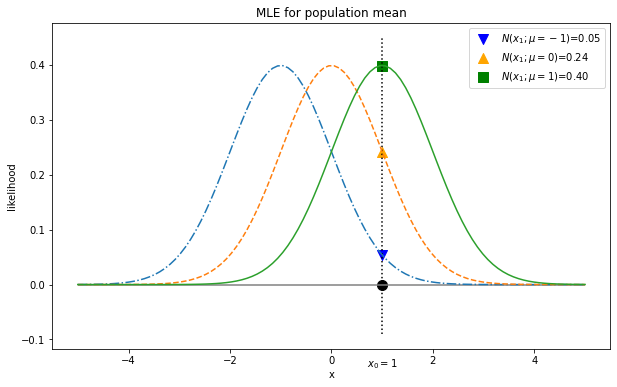

mu=-1: likelihood at x_0=1 is 0.0540
mu=0: likelihood at x_0=1 is 0.2420
mu=1: likelihood at x_0=1 is 0.3989


In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(10,6))

x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1)
p2 = sp.stats.norm(loc=0).pdf(1)
p3 = sp.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='blue', marker='v', 
         label=r"$N(x_1;\mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='orange', marker='^', 
         label=r"$N(x_1;\mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='green', marker='s', 
         label=r"$N(x_1;\mu=1)$={:.2f}".format(np.round(p3, 2)))

# TODO 4-1, 4-2, 4-3 solution
plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")

plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.hlines(0, -5, 5, colors='gray', linestyle="-")
plt.text(1-0.3, -0.15, "$x_0=1$")

plt.xlabel("x")
plt.ylabel("likelihood")
plt.legend()
plt.title("MLE for population mean")
plt.show()

x0=1

# TODO 4-4, 4-5, 4-6 solution
print('mu=-1: likelihood at x_0=1 is {:.4f}'.format(norm.pdf(x0, -1, 1)))
print('mu=0: likelihood at x_0=1 is {:.4f}'.format(norm.pdf(x0, 0, 1)))
print('mu=1: likelihood at x_0=1 is {:.4f}'.format(norm.pdf(x0, 1, 1)))

### **TODO5.(Solution)** 그래프를 그리고 관찰한 사실을 바탕으로 다음의 빈칸의 결과를 기입해주세요.

그려진 그래프의 관찰을 통해 다음의 사실을 확인할 수 있습니다.

*   $N(x;μ=−1)$이라는 확률분포에서 $x_0=1$이 나올 가능도(확률밀도)는 **0.05**이다.
*   $N(x;μ=0)$이라는 확률분포에서 $x_0=1$이 나올 가능도(확률밀도)는 **0.24**이다.
*   $N(x;μ=1)$이라는 확률분포에서 $x_0=1$이 나올 가능도(확률밀도)는 **0.40**이다.

어떤 모평균을 갖는 확률분포를 고르는 것이 합리적일까요? 당연히 가장 큰 가능도를 가진 확률분포를 선택해야 합니다. 그림에서 볼 수 있듯이 $\mu = $**1**일 때(녹색 그래프) 가장 큰 값의 Likelihood를 갖게 되며 최대가능도 추정에 의해 모평균의 추정값은 $\hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta) = $**1** 입니다.

정규분포에서 기댓값 모수와 분산 모수를 입력 변수로 가지는 가능도 함수를 그리면 각각 다음과 같습니다. 

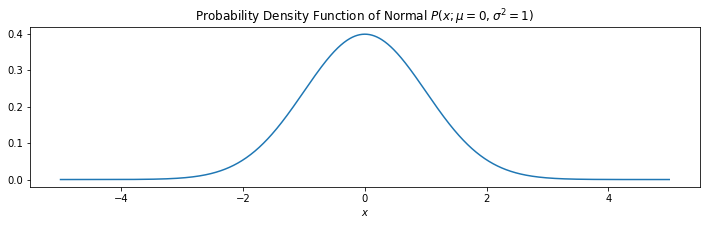

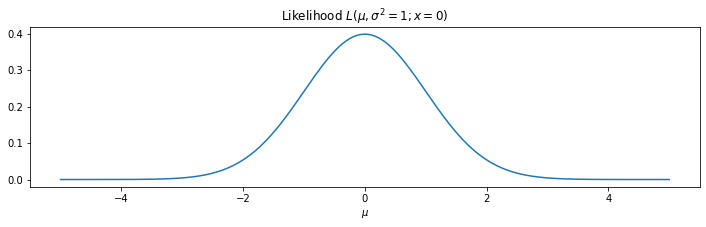

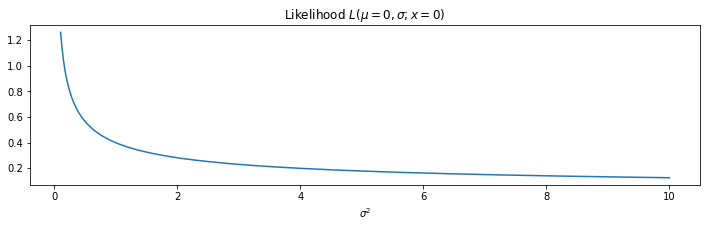

In [ ]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(12,10))

def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(311)

mu = 0
variance = 1
sigma = math.sqrt(variance)
mus = np.linspace(-5, 5, 1000)
plt.plot(mus, stats.norm.pdf(mus, mu, sigma))
plt.title("Probability Density Function of Normal $P(x; \mu=0, \sigma^2=1)$")
plt.xlabel("$x$")
plt.show()

plt.figure(figsize=(12,10))

plt.subplot(312)
plt.plot(mus, likelihood_mu)
plt.title("Likelihood $L(\mu, \sigma^2=1; x=0)$")
plt.xlabel("$\mu$")
plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.figure(figsize=(12,10))

plt.subplot(313)
plt.plot(sigma2s, likelihood_sigma2)
plt.title("Likelihood $L(\mu=0, \sigma; x=0)$")
plt.xlabel("$\sigma^2$")
plt.show()

출력된 그래프의 형태를 비교해보면 기댓값 모수를 입력 변수로 가지는 가능도함수의 모양이 확률밀도함수와 같은 모양인 것은 (i.e.,입력이 되는 독립변수에 대해 $x$와 $\mu$를 바꾸어도 식이 같아지는) *정규분포*라는 확률밀도함수가 가지는 특별한 성질 때문이며 아주 우연히 이렇게 된 것뿐입니다. 물론, 위의 그래프에서 볼 수 있듯이 $\sigma^2$에 대해서는 모양이 다릅니다. 즉, 분포의 종류에 따라서 가능도함수와 확률밀도함수 자체가 다른 모양인 경우가 보다 일반적입니다.

**[참고]** $L(\mu,\sigma^2)$은 모수가 되는 두 변수$(\mu,\sigma^2)$에 대해 이변수 함수이므로 3차원 공간상에서 표현하면 다음과 같습니다.

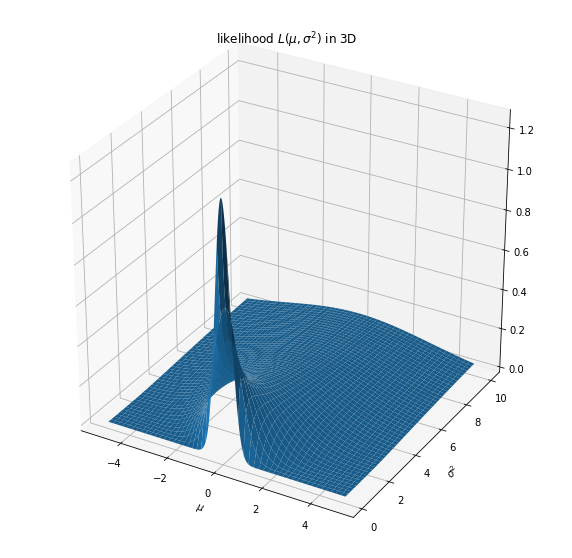

In [ ]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('likelihood $L(\mu, \sigma^2)$ in 3D')
plt.show()

### **[Extra Work]**(Solution) 베르누이분포의 최대가능도 모수 추정

*이산형* 확률변수 $X$가 베르누이분포를 따를 때, 모수가 $\mu$인 베르누이분포의 확률질량함수는 다음과 같습니다.

$$\begin{align}
p(x ; \mu ) = \text{Bern}(x ; \mu ) = \mu^x (1 - \mu)^{1-x}
\end{align}$$

 


$n$번의 독립적인 반복시행으로 표본 데이터가 $x_1,⋯,x_n$이 있는 경우에는 모두 독립이므로, 전체 확률질량함수는 각각의 확률질량함수의 곱과 같은데요.

\begin{align}
L(\mu ; x_1, \cdots, x_n) = p(x_1, \cdots, x_n;\mu) = \prod_{i=1}^n  \mu^{x_i} (1 - \mu)^{1-x_i}
\end{align}

최대가능도 추정법으로 베르누이분포의 모수 $\mu$를 추정해보세요. ($\hat\mu_{\text{MLE}} = \arg \max_{\mu} L(\mu) = \dfrac{N_1}{N}
$)

* 힌트: $x=1$ (성공) 또는 $x=0$ (실패) 이므로 성공 횟수와 실패 횟수를 다음과 같이 $n_1, n_0$라고 표기하여 이를 활용해보세요.($n_1 + n_0 = n$)

\begin{align}
n_1 = \sum_{i=1}^n {x_i}, \;\;\; n_0 = n - \sum_{i=1}^n {x_i}
\end{align}